# Performance Measure
- 여러 모델을 생성해서 비교하고 그 중 가장 성능이 좋은 것을 선택하는 기준은?

> ※ Accuracy, Precision, Recall, F1 score 등등

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import Image
from matplotlib import rc # plot에서 한글 출력
rc("font", family='NanumGothic') # 한글 폰트 설정

In [ ]:
#import os
#os.chdir(r'C:/Users/User/Desktop')
#os.getcwd()

## binary-class

In [ ]:
#Image("img/make_classification.png",  width=500, height=500)
# n_informative : 상관관계 없음=0
# n_redundant : 상관관계가 있는 변수 개수
# weight : 각 클래스마다 0과 1의 비율 지정할 수 있음

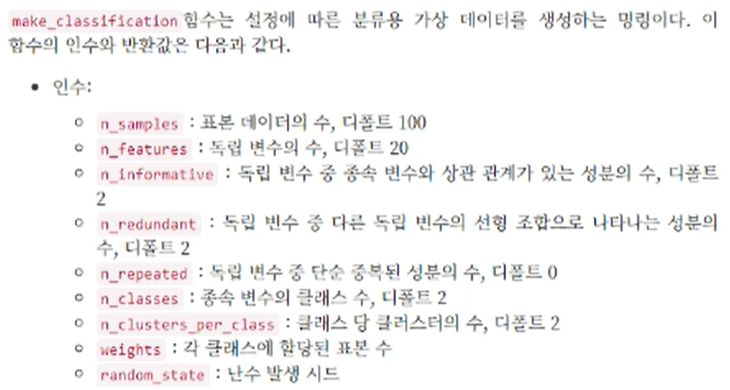

In [ ]:
# 설정에 따른 분류용 가상 데이터를 생성 # imbalanced data
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=200, n_features=3, n_classes=2, weights=[0.8,0.2], \
                           n_redundant=0, random_state=42)

In [ ]:
X

array([[-1.47858625, -1.57190824,  0.33115984],
       [ 0.71161488, -1.32596   , -0.96194585],
       [ 0.38406545, -0.91827298, -0.75364166],
       [-0.5100164 ,  1.08757084,  1.44980893],
       [ 1.00629281,  0.48454539,  1.18669675],
       [ 1.20121392, -0.41117095,  1.15293235],
       [-2.03923218, -1.16722834, -0.71314409],
       [-0.92216532,  2.46360977,  0.73263898],
       [-1.03724615,  0.9607631 , -0.70939313],
       [ 0.75138712, -1.47311746,  0.79614079],
       [-1.18325851, -1.20965892, -1.27785224],
       [-0.64657288, -0.52240617, -1.09021717],
       [ 1.62861555, -0.24704446, -1.42738807],
       [ 3.07888081, -0.87996677, -0.58081543],
       [-1.05921352, -2.4914064 ,  0.74783609],
       [ 1.36687427, -0.96418585, -0.32880415],
       [ 1.87679581,  1.77079592,  1.53557656],
       [ 0.77086519, -0.05829167,  1.42175341],
       [ 0.4134349 ,  0.17258347,  0.38210454],
       [-0.85608383, -0.29492875,  0.59513618],
       [-1.38010146, -0.78791701, -2.001

In [ ]:
print(f'y=0의 갯수: {len(y[y==0])}')
print(f'y=1의 갯수: {len(y[y==1])}')

y=0의 갯수: 160
y=1의 갯수: 40


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44060 (\N{HANGUL SYLLABLE GAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 46021 (\N{HANGUL SYLLABLE DOG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47549 (\N{HANGUL SYLLABLE RIB}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48320 (\N{HANGUL SYLLABLE BYEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages

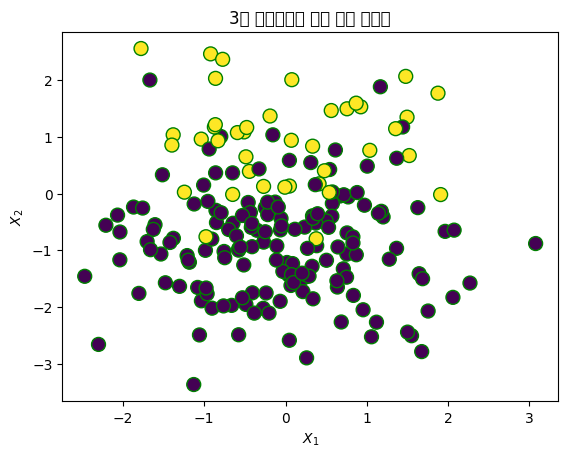

(200, 3)
(200,)


In [ ]:
plt.title("3개 독립변수를 가진 가상 데이터")
plt.scatter(X[:,0], X[:,1], marker='o', c=y, s=100, edgecolors="g")
plt.xlabel("$X_1$")
plt.ylabel("$X_2$")
plt.show()

print(X.shape)
print(y.shape)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# 실험 모델 : LogisticRegression 사용
from sklearn.linear_model import LogisticRegression
b_log = LogisticRegression()

In [ ]:
b_log.fit(X_train,y_train)

LogisticRegression()

In [ ]:
y_pred = b_log.predict(X_test)
print(f'test_data_shape: {y_pred.shape}')

test_data_shape: (40,)


In [ ]:
# confusion maxrix package
import pandas as pd
from sklearn.metrics import confusion_matrix
import seaborn as sns

##### Confusion matrix
- 모델이 얼마나 잘 예측하는지를 나타내주는 매트릭스

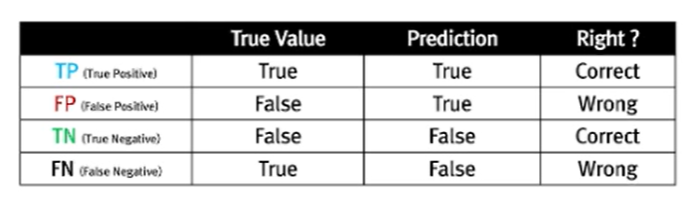


> 1. 정답이 참인가 거짓인가? T: True, F: False
2. 추정이 참인가 거짓인가? P: Positive, N: Negative

In [ ]:
#1. example
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,27,5,32
1,3,5,8
All,30,10,40


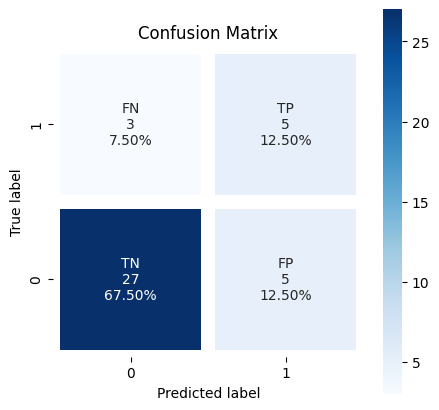

In [ ]:
#2. example
con_mat = confusion_matrix(y_test, y_pred, labels=[0,1])

group_names = ["TN","FP","FN","TP"]
group_counts = ["{0:0.0f}".format(value) for value in con_mat.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in con_mat.flatten()/np.sum(con_mat)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
fig, ax = plt.subplots(figsize=(5,5))

sns.heatmap(con_mat, annot=labels, fmt="", cmap='Blues', linewidths=10, square=True)
ax.set_ylim([0,2])
ax.set_title("Confusion Matrix")
plt.ylabel('True label')
plt.xlabel('Predicted label' + "")
plt.show()

In [ ]:
from sklearn.metrics import roc_curve, auc

##### ROC(Receiver Operating Characteristic) curve
- Positive으로 잘못판단 한 것(FPR)에 의한 진짜 Positive의 비율 함수(TPR)[범위: 0.5~1]
> - y축에는 재현율(Sensitivity->TruePositiveRate)을, x축에는 1-특이도(1-Specificity->FalsePositiveRate)를 축으로 하는 그래프
> - TruePositiveRate(민감도): 1인 값에 대해서 1로 잘 예측한 비율(ex] 암환자 -> 암으로 판별)
> - FalsePositiveRate(1-특이도): 0인 값에 대해서 1로 잘못 예측한 비율(ex] 정상인 -> 암으로 판별)

※ 모델이 제대로 분류했다면 위로, 제대로 분류하지 못했다면 오른쪽으로 선이 이동하면서 곡선을 생성

In [ ]:
#Image("img/ROC.png",  width=750, height=750)
# 성능이 좋을수록 FN, FP가 겹치는 면적이 커짐
# ROC curve & AUC : 성능이 좋을 수록 면적이 커짐

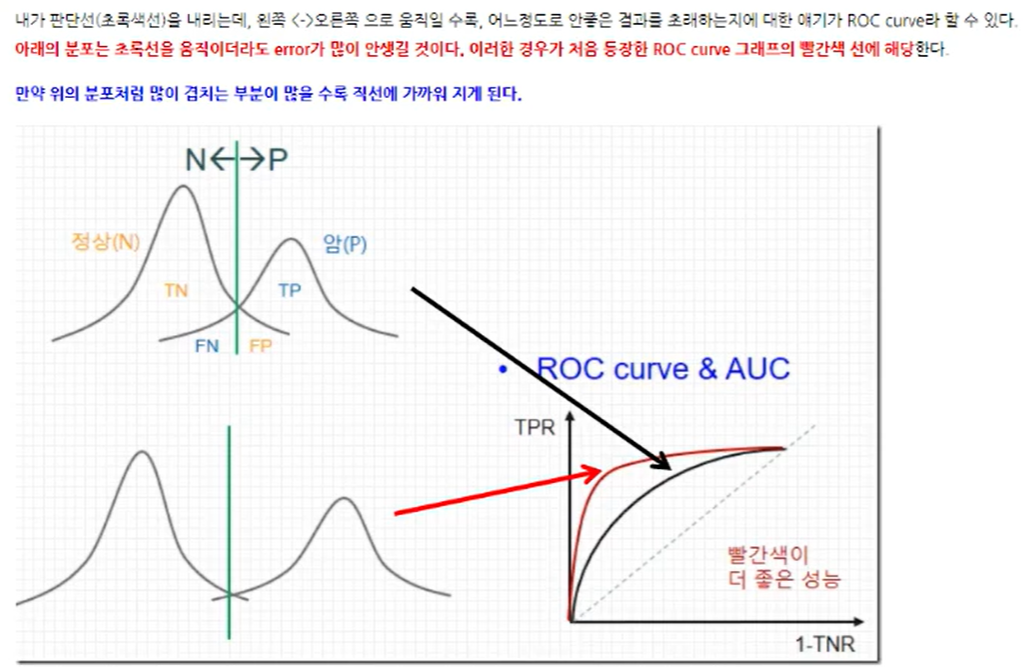

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51652 (\N{HANGUL SYLLABLE JIN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51676 (\N{HANGUL SYLLABLE JJA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50577 (\N{HANGUL SYLLABLE YANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48708 (\N{HANGUL SYLLABLE BI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-package

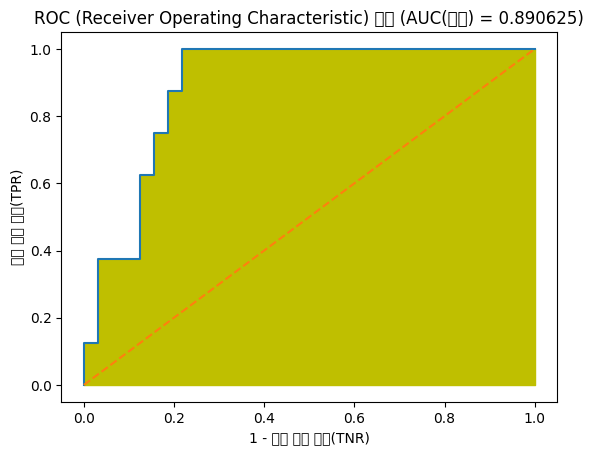

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

fpr, tpr, thresholds = roc_curve(y_test, b_log.decision_function(X_test))

plt.plot(fpr, tpr)
plt.fill_between(fpr, tpr, color='y')
plt.plot([0, 1], [0, 1], '--')
plt.xlabel('1 - 진짜 음성 비율(TNR)')
#plt.xlabel('거짓 양성 비율(FPR)')
plt.ylabel('진짜 양성 비율(TPR)')

auc_s = auc(fpr, tpr) # auc(score)
plt.title('ROC (Receiver Operating Characteristic) 곡선 (AUC(면적) = {})'.format(auc_s))
plt.show()

##### AUC(Area Under Curve)
> ROC curv 그래프 아래의 면적값을 이용한 수치,
최대값은 1이며 좋은 모델(즉, Fall-out에 비해 Recall 값이 클수록) 1에 가까운 값

In [ ]:
from sklearn.metrics import roc_auc_score
auc_score = roc_auc_score(y_test, b_log.decision_function(X_test))
print(auc_score)

0.890625


In [ ]:
# metrices package
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score
from sklearn.metrics import classification_report

##### Accuracy
- 전체 예측에 대해 올바르게 예측한 비율
- 클라스별 분포가 같을 때 주로 사용하는 수치
> 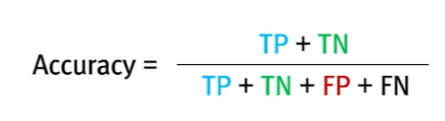

In [ ]:
#1. model
b_log.score(X_test, y_test)

0.8

In [ ]:
#2. tool
accuracy_score(y_test, y_pred)

0.8

##### Precision
- True라고 예측한 것 중에서 실제 True인 것에 대한 비율
> 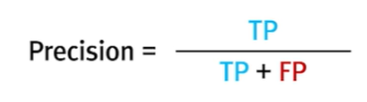

In [ ]:
precision_score(y_test, y_pred, average='binary')

0.5

##### Recall
- 실제 True인 것 중에서 True라고 예측한 것에 대한 비율
> 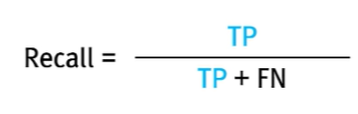

In [ ]:
recall_score(y_test, y_pred, average='binary')

0.625

## 정리
> 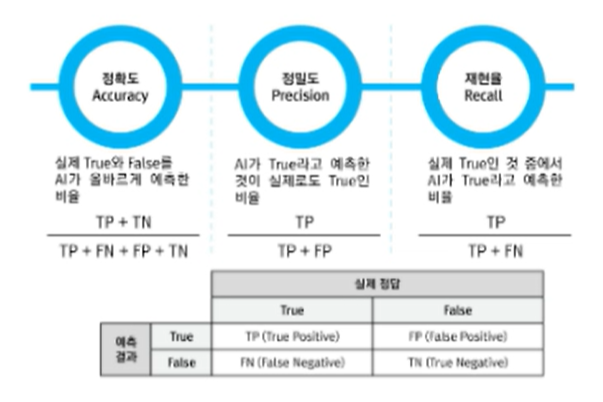

##### f1_score
- Precision과 Recall의 조화평균
- 데이터 class가 불균형 구조일 때, 모델의 성능을 정확하게 평가
!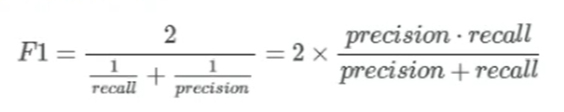

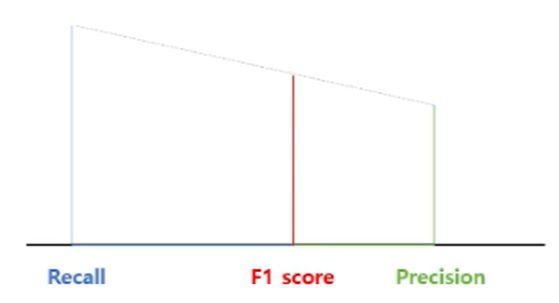

In [ ]:
f1_score(y_test, y_pred, average='binary')

0.5555555555555556

##### classification_report

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.84      0.87        32
           1       0.50      0.62      0.56         8

    accuracy                           0.80        40
   macro avg       0.70      0.73      0.71        40
weighted avg       0.82      0.80      0.81        40



### Kfold cross validation
> : K개의 fold를 만들어서 진행하는 교차검증
> - 장점: 적은 데이터셋에 대해 정확도 향상가능, 데이터 수가 적은데
test나 valid로 split을하면 그만큼 데이터가 더 적어져 underfitting 될 가능성 높아짐
> - 단점: Train set, test set을 통해 진행하는 학습법에 비해 시간 소요 큼

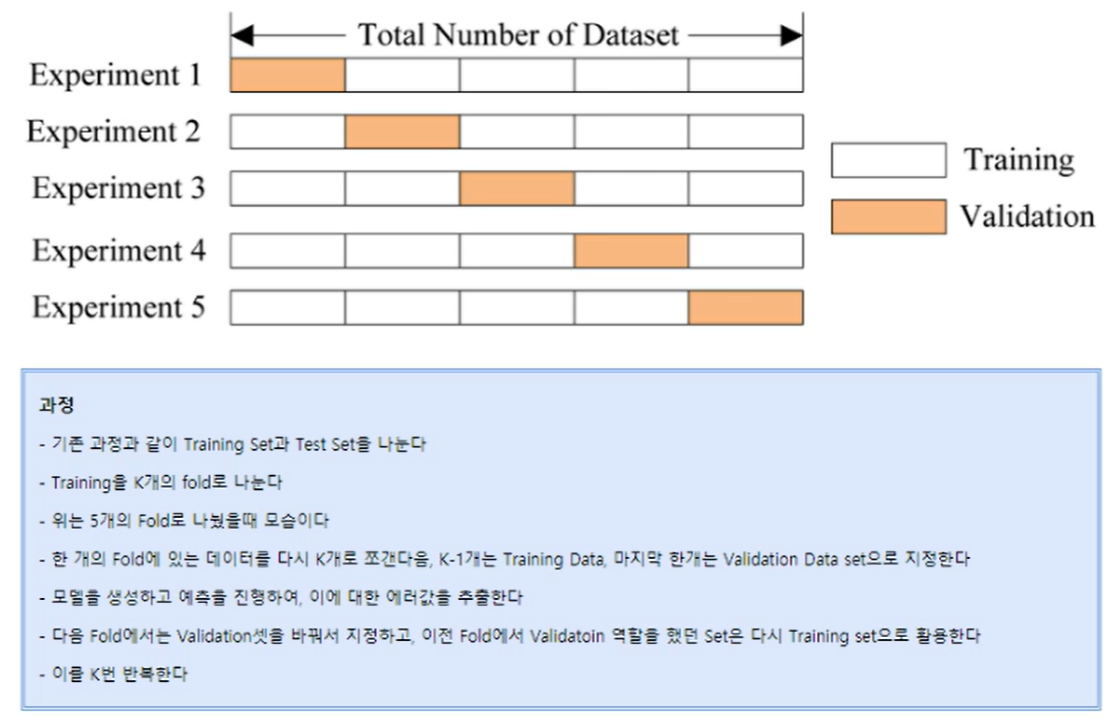

In [ ]:
from sklearn.model_selection import KFold

In [ ]:
# Data를 shuffle하면서 각 3등분으로 나눔 그 후 validation

kfold = KFold(n_splits=3, shuffle=True)

In [ ]:
xx = np.random.rand(6,4)

In [ ]:
xx

array([[0.30657376, 0.00324933, 0.03741317, 0.37365765],
       [0.40395157, 0.24408024, 0.2113118 , 0.56630108],
       [0.4224206 , 0.52548488, 0.47207646, 0.97273609],
       [0.34639378, 0.55717333, 0.06669962, 0.34353817],
       [0.75793503, 0.12860063, 0.94912875, 0.47360724],
       [0.77656254, 0.35026965, 0.0350735 , 0.15902699]])

In [ ]:
# train, test 데이터 분리 확인
for train_ind, test_ind in kfold.split(xx) :
    print(train_ind, test_ind)

[0 1 3 5] [2 4]
[2 3 4 5] [0 1]
[0 1 2 4] [3 5]


In [ ]:
acc = []
for train_ind, test_ind in kfold.split(X) :
    b_log.fit(X[train_ind], y[train_ind])
    acc.append(b_log.score(X[test_ind], y[test_ind]))

acc

[0.835820895522388, 0.9402985074626866, 0.8939393939393939]

In [ ]:
np.mean(acc)

0.8900195989748229

## multi-class
> 클래스가 다수일 땐 metric은 어떻게 구할까?

In [ ]:
from sklearn import datasets

iris = datasets.load_iris()

X2 = iris.data
y2 = iris.target

In [ ]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=42)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(max_depth=2)

In [ ]:
dtc.fit(X_train2, y_train2)

DecisionTreeClassifier(max_depth=2)

In [ ]:
y_pred2 =  dtc.predict(X_test2)

In [ ]:
#1. example
pd.crosstab(y_test2, y_pred2, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,2,All
True,,,,
0,10,0,0,10
1,0,8,1,9
2,0,0,11,11
All,10,8,12,30


#### multi class example
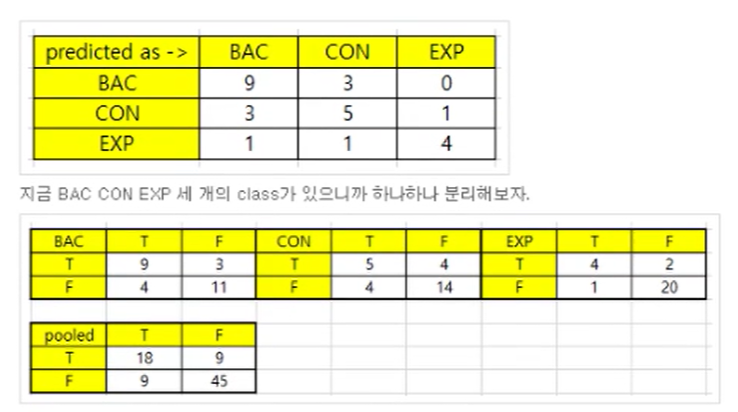

In [ ]:
!pip install mlxtend

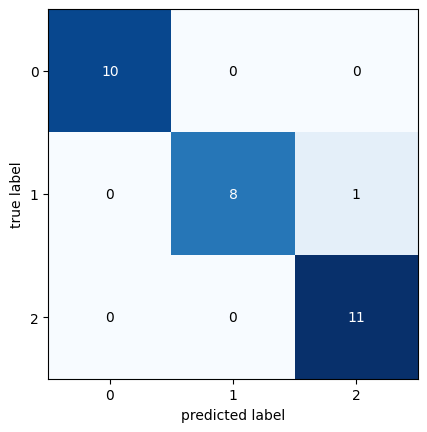

In [ ]:
#2. example
from mlxtend.plotting import plot_confusion_matrix

cm2 = confusion_matrix(y_test2, y_pred2, labels=[0,1,2])

fig, ax = plot_confusion_matrix(conf_mat=cm2)
plt.show()

##### Accuracy

In [ ]:
dtc.score(X_test2, y_test2)

0.9666666666666667

In [ ]:
accuracy_score(y_test2, y_pred2)

0.9666666666666667

##### Recall

In [ ]:
# 어떤 클래스인지 모르기 때문에 멀티클래스를 그냥 집어 넣으면 에러가 발생
#recall_score(y_test, y_pred2)

### 기준

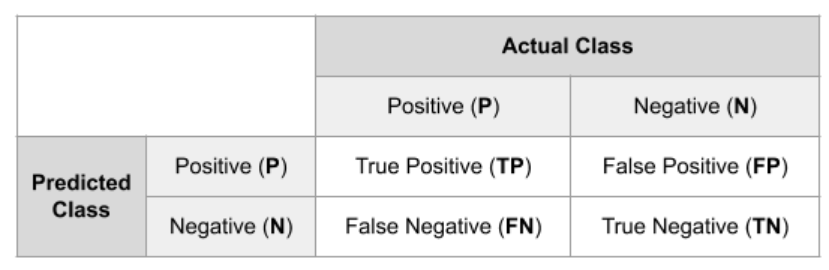

#### recall_micro
- column 기준으로 테이블 수치를 종합하여 구한 것(pooled table)

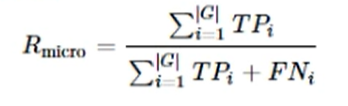

In [ ]:
recall_score(y_test2, y_pred2, average='micro')

0.9666666666666667

#### recall_macro
- column 기준으로 각각의 테이블 수치를 구하고 더해서 평균 (each tables)

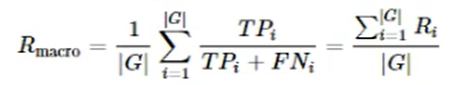

In [ ]:
#1
recall = np.diag(cm2) / np.sum(cm2, axis = 1)
print(np.mean(recall))

#2
recall_score(y_test2, y_pred2, average='macro')

0.9629629629629629


0.9629629629629629

##### precision

#### precision_micro
- row 기준으로 테이블 수치를 종합하여 구한 것(pooled table)

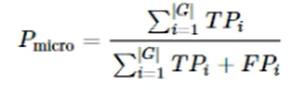

In [ ]:
precision_score(y_test2, y_pred2, average='micro')

0.9666666666666667

#### precision_macro
- row 기준으로 각각의 테이블 수치를 구하고 더해서 평균 (each tables)

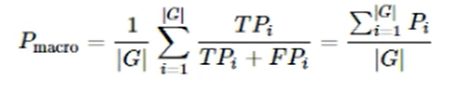

In [ ]:
#1
precision = np.diag(cm2) / np.sum(cm2, axis = 0)
print(np.mean(precision))

#2
precision_score(y_test2, y_pred2, average='macro')

0.9722222222222222


0.9722222222222222

##### f1_score
- binary의 공식과 같음
- average 종류만 다르게 설정하면 됌

In [ ]:
f1_score(y_test2, y_pred2, average='micro')

0.9666666666666667

In [ ]:
f1_score(y_test2, y_pred2, average='macro')

0.9658994032395567